## NLP & Binary Classification: Yelp Reviews
https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

** Dataset Information: **

1000 sentences labelled with positive or negative sentiment from yelp.com 

** Attribute Information: (1 features and 1 class)**

- Sentences	
- Score : 1 (for positive) or 0 (for negative)	

** Objective of this project **

predict sentiment (positive or negative) from sentences

# Data

In [30]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Load Data
df = pd.read_csv('yelp_labelled.txt', delimiter = '\t', quoting = 3, 
                 header=None, names=('Sentences','Score'))
df.head()

,Sentences,Score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Sentences    1000 non-null object
Score        1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [15]:
df.describe()

,Score
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [16]:
df['Score'].value_counts() #balanced

1    500
0    500
Name: Score, dtype: int64

# Data preprocessing

** Clean text **

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Sentences'][i])
    review = review.lower().split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

** Creat Bag-Of-Words model **

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df['Score'].values
print(X.shape,y.shape)

(1000, 1500) (1000,)


In [26]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 1500) (200, 1500) (800,) (200,)


In [28]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array([0, 1], dtype=int64), array([398, 402], dtype=int64))

# Model Train

Accuracy: 99.6%


             precision    recall  f1-score   support

          0       0.99      1.00      1.00       398
          1       1.00      1.00      1.00       402

avg / total       1.00      1.00      1.00       800



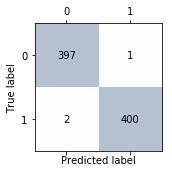

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

#accuracy score
y_pred_train = model.predict(X_train)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_train,y_pred_train)*100))

#classification report
print('\n')
print(classification_report(y_train, y_pred_train))

#confusion matrix
confmat = confusion_matrix(y_train, y_pred_train)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Model Evaluation with Test set

Accuracy: 80.0%


             precision    recall  f1-score   support

          0       0.80      0.81      0.81       102
          1       0.80      0.79      0.79        98

avg / total       0.80      0.80      0.80       200



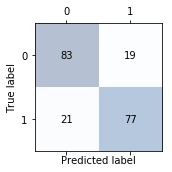

In [32]:
# predict class with test set (new, unseen)
y_pred_test = model.predict(X_test)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()